<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Projeto_modulo_3/Projeto_modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from fbprophet import Prophet

In [2]:
casos_full = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/caso_full.csv.gz?raw=true", 
                         compression = "gzip")

casos_full.loc[:,"date"] = pd.to_datetime(casos_full.loc[:,"date"], format = "%Y-%m-%d")

In [3]:
casos_full.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [4]:
cidade_sp = casos_full.query("city_ibge_code == '3550308'")

In [6]:
cidade_sp.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
2000296,São Paulo,3550308.0,2020-02-25,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
2000298,São Paulo,3550308.0,2020-02-26,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
2000300,São Paulo,3550308.0,2020-02-27,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0
2000302,São Paulo,3550308.0,2020-02-28,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0,0,4,city,SP,1,0
2000304,São Paulo,3550308.0,2020-02-29,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0,0,5,city,SP,0,0


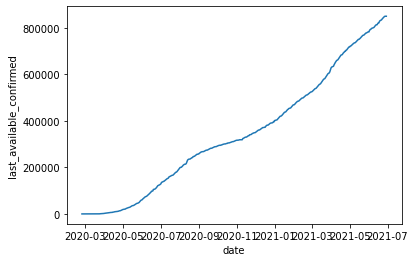

In [7]:
sns.lineplot(data = cidade_sp, x = "date", y = "last_available_confirmed")

In [14]:
df_csp = pd.DataFrame()
df_csp.loc[:,"ds"] = cidade_sp.loc[:,"date"][:85] # data em que foram determinados os feriados
df_csp.loc[:,"y"] = cidade_sp.loc[:,"new_confirmed"][:85]

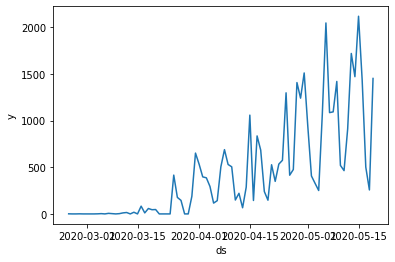

In [15]:
sns.lineplot(data = df_csp, x = "ds", y = "y")

In [44]:
df_csp_teste = pd.DataFrame()
df_csp_teste.loc[:,"ds"] = cidade_sp.loc[:,"date"][85:175]
df_csp_teste.loc[:,"y"] = cidade_sp.loc[:,"new_confirmed"][85:175]

Teste simples de efeito de feriado

In [61]:
feriados_originais = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-06-11',
'2020-07-09',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-11-20',
'2020-12-25'
]

feriados_originais = pd.DataFrame({
    "holiday" : "sp_original",
    "ds" : pd.to_datetime(feriados_originais)
})

feriados_novos = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_novos = pd.DataFrame({
    "holiday" : "sp_novos",
    "ds" : pd.to_datetime(feriados_novos)
})

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


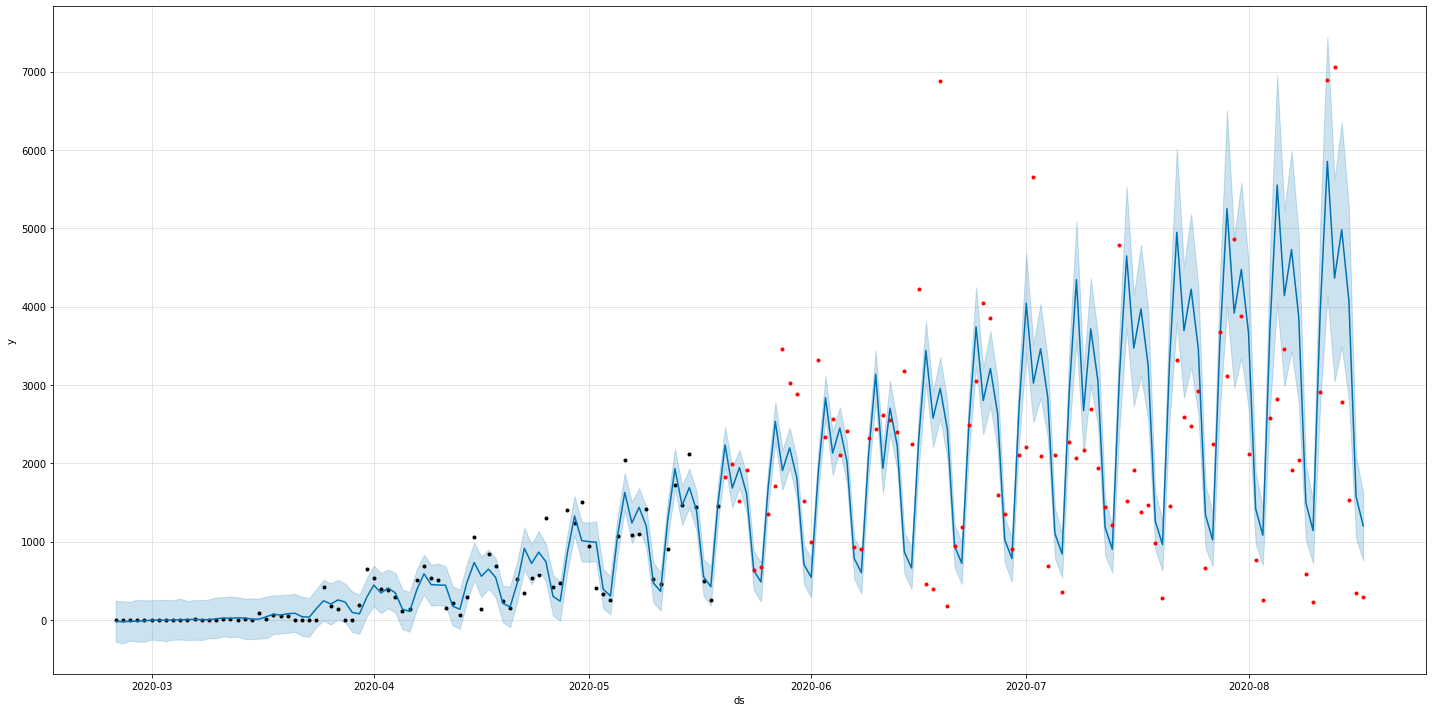

In [47]:
m1 = Prophet(changepoint_prior_scale = 1, holidays = feriados_originais,
             seasonality_mode = "multiplicative") # m1 == feriado original

m1.fit(df_csp)
df_prev1 = m1.make_future_dataframe(periods = 90)

prev1 = m1.predict(df_prev1)

m1.plot(prev1, figsize = (20,10));
plt.plot(df_csp_teste.loc[:,"ds"], df_csp_teste.loc[:,"y"], "r.")

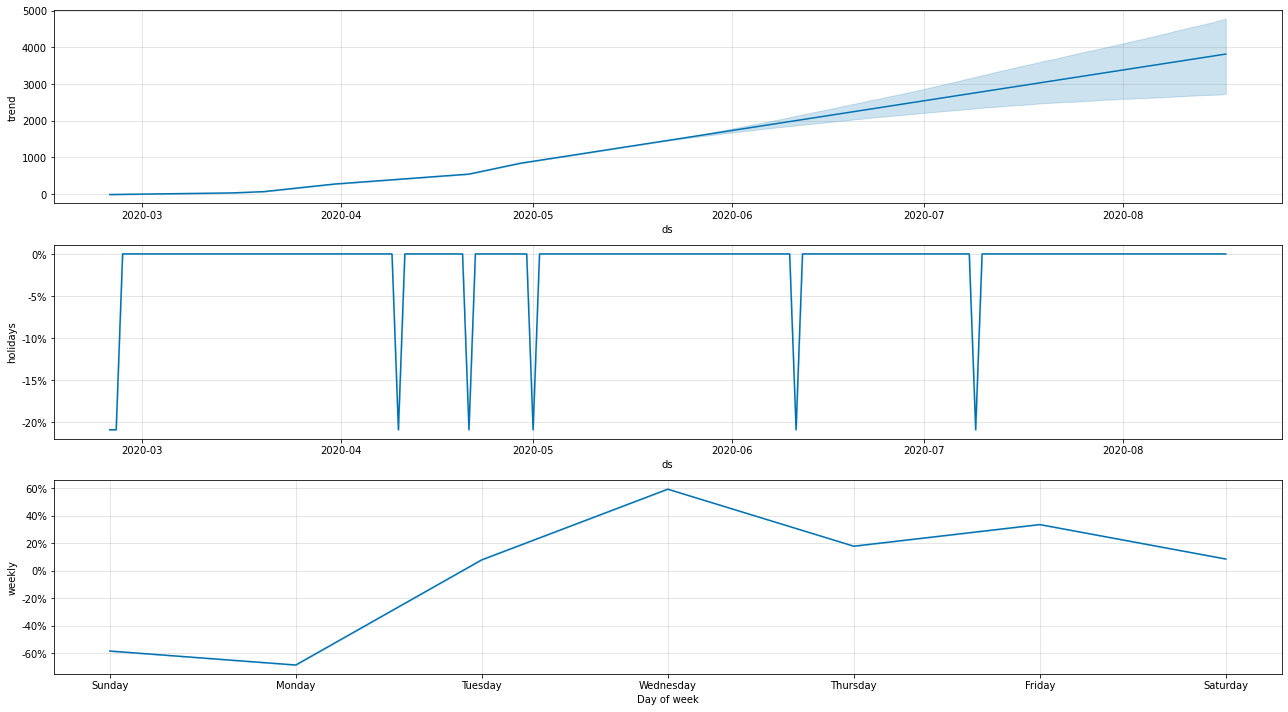

In [38]:
m1.plot_components(prev1, figsize = (18, 10));

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


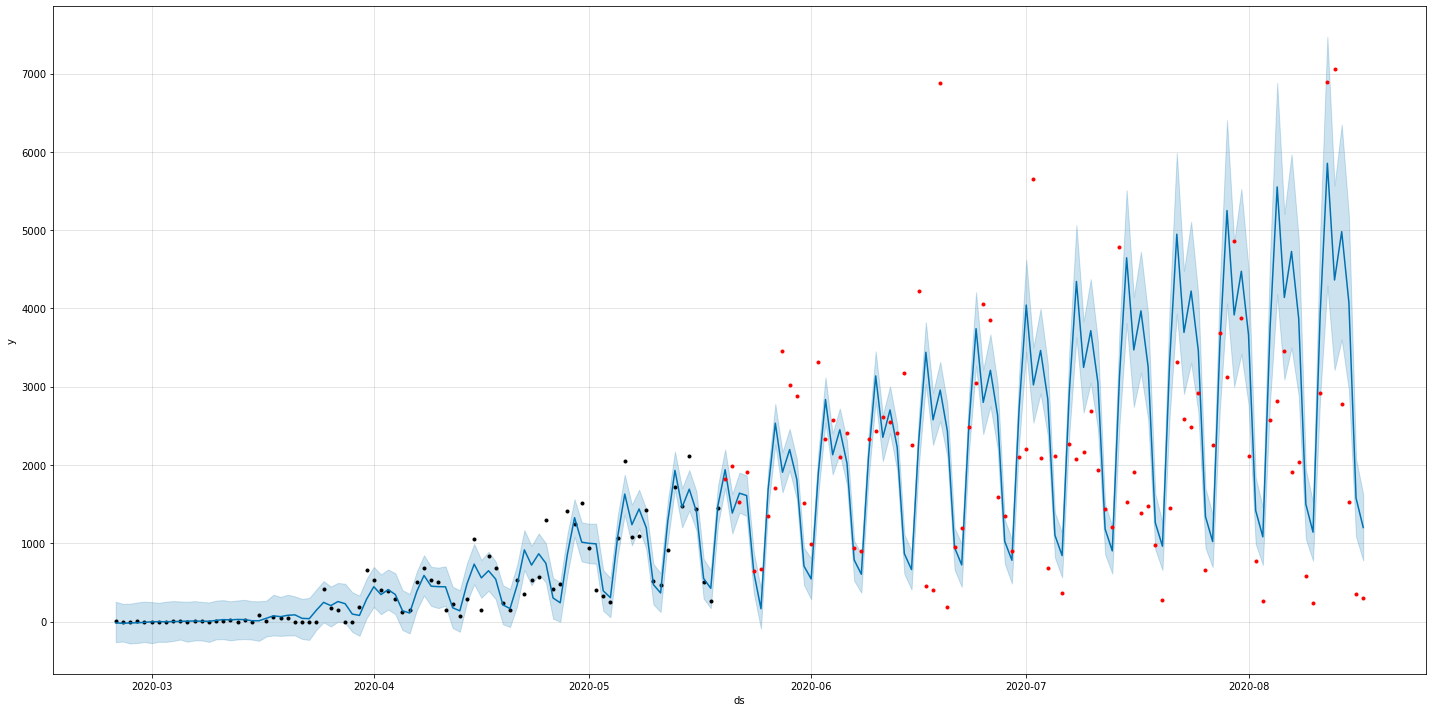

In [48]:
m2 = Prophet(changepoint_prior_scale = 1, holidays = feriados_novos, 
             seasonality_mode = "multiplicative") # m2 == feriado novo

m2.fit(df_csp)
df_prev2 = m2.make_future_dataframe(periods = 90)

prev2 = m2.predict(df_prev2)

m2.plot(prev2, figsize = (20,10));
plt.plot(df_csp_teste.loc[:,"ds"], df_csp_teste.loc[:,"y"], "r.")

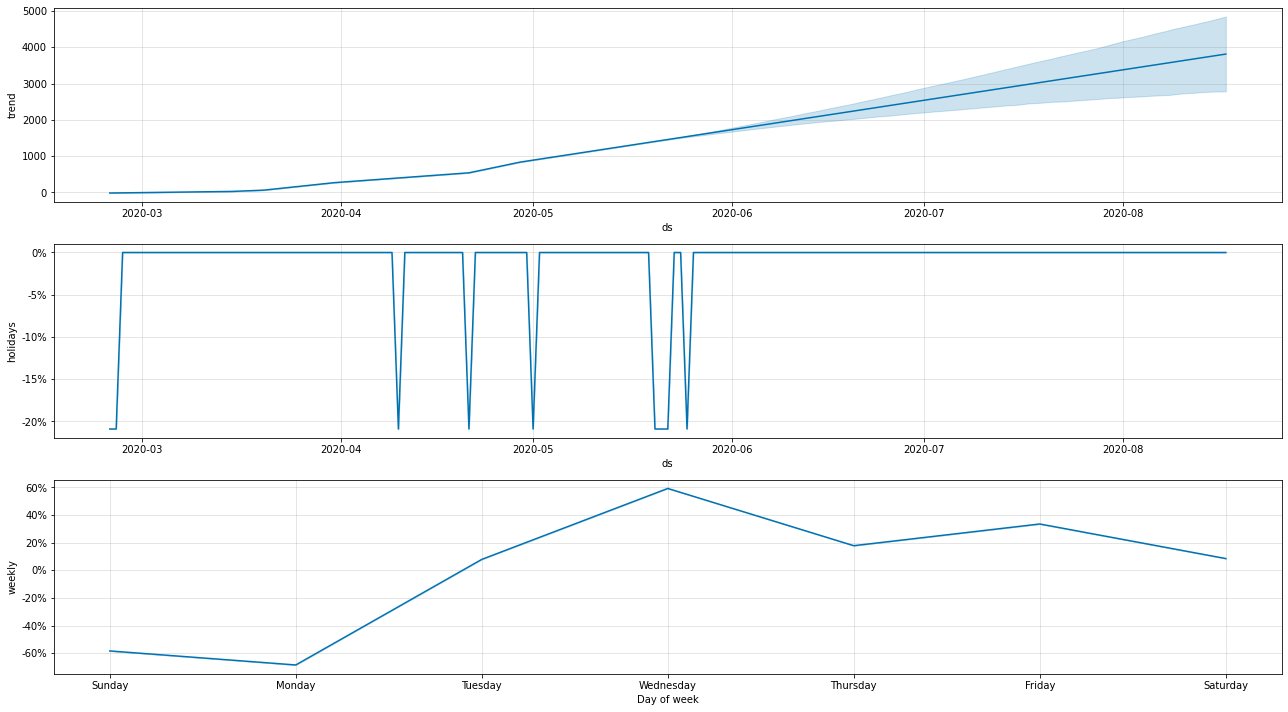

In [40]:
m2.plot_components(prev2, figsize = (18, 10));

Teste do efeito de evasão no feriado antecipado: Será que teve mais casos nas cidades de praia de sp?

In [63]:
feriados_sp_2021

,holiday,ds
0,sp_2021,2021-01-01
1,sp_2021,2021-01-25
2,sp_2021,2021-02-15
3,sp_2021,2021-02-16
4,sp_2021,2021-02-17
5,sp_2021,2021-03-26
6,sp_2021,2021-03-29
7,sp_2021,2021-03-30
8,sp_2021,2021-03-31
9,sp_2021,2021-04-01


In [66]:
df2_csp = pd.DataFrame()
df2_csp.loc[:,"ds"] = cidade_sp.loc[:,"date"][:440]
df2_csp.loc[:,"y"] = cidade_sp.loc[:,"new_confirmed"][:440]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_novos, feriados_sp_2021))
feriados

,holiday,ds
0,sp_novos,2020-02-25
1,sp_novos,2020-02-26
2,sp_novos,2020-04-10
3,sp_novos,2020-04-21
4,sp_novos,2020-05-01
5,sp_novos,2020-05-20
6,sp_novos,2020-05-21
7,sp_novos,2020-05-22
8,sp_novos,2020-05-25
9,sp_novos,2020-09-07


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


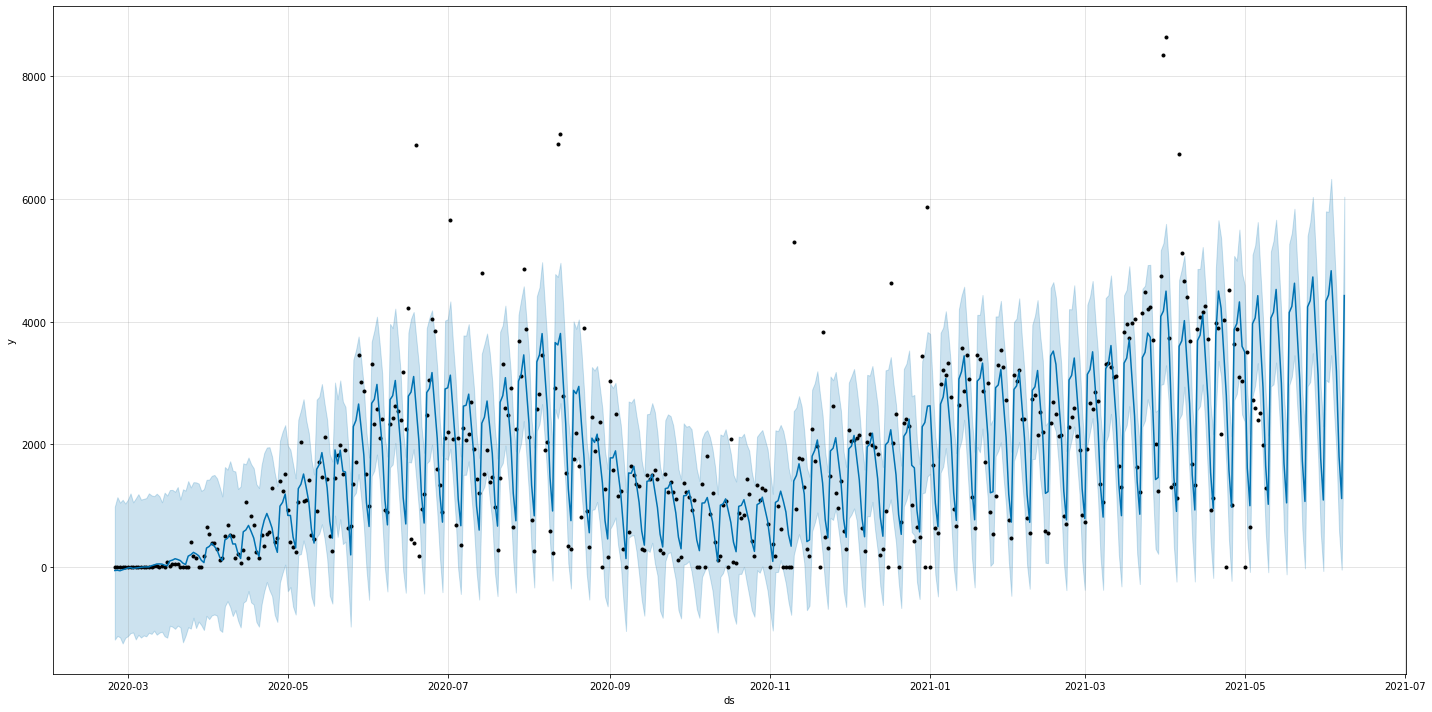

In [71]:
m3 = Prophet(changepoint_prior_scale = 10, holidays = feriados, seasonality_mode = "multiplicative")

m3.fit(df2_csp)
df_prev3 = m3.make_future_dataframe(periods = 30)

prev3 = m3.predict(df_prev3)

m3.plot(prev3, figsize = (20,10));
